# CLEANING THE MISSING DATA

 This step involves identifying incorrect data, missing data, duplicated data, and irrelevant data. Moreover, Data cleaning is the process of deleting, replacing, or modifying data to remove outliers and incorrect values.

### Why are their Missing values?? 
We have Depression Survey
1. They hesitate to put down the information.
2. Survey informations are not that valid.
3. Men--salary.
4. Women---age.

dataset should be collected from multiple sources.

### Data that will be missing :
    1. Continous data
    2. categorial data

In [449]:
import pandas as pd
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [450]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### All the techniques of handling missing values
1. Mean/ Median/Mode imputation
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Frequent categories imputation

## 1. Mean/ Median/Mode imputation
 We solve this by replacing the NAN with the most frequent occurance of the variables

In [514]:
# Here we used titanic dataset.
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [515]:
#the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [516]:
df[df['Age'].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [517]:
# replace this nan value with median with help of function

def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [518]:
median=df.Age.median()
median

28.0

In [519]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


Now we, check if standand deviation of age and age_median has changed after this imputation or not?

In [520]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [521]:
import matplotlib.pyplot as plt
%matplotlib inline

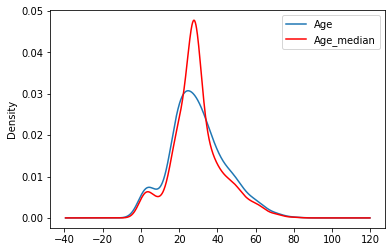

In [537]:
fig = plt.figure()
ax = fig.add_subplot()
df.Age.plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)

Insight:
   * Change or Distortion in the original variance.

## 2.Random Sample Imputation
#### Aim:
Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

In [524]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [525]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [526]:
#no. of nan values in age.
df['Age'].isnull().sum()

177

In [527]:
#all nan values is replaced with some random sample value
# we use drop na because we dont to pick the sample of nan values but the sample of real values.
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [528]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [529]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [530]:
median=df.Age.median()
median

28.0

In [531]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [532]:
import matplotlib.pyplot as plt
%matplotlib inline

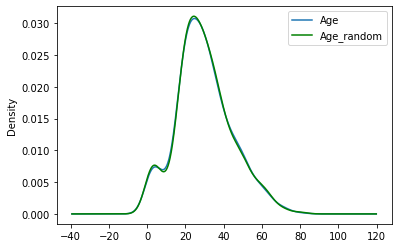

In [536]:
fig = plt.figure()
ax = fig.add_subplot()
df.Age.plot(kind='kde', ax=ax)
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)

Insights:
* advantage: There is less distortion in variance
* diadvantage: Every situation randomness wont work

## 3. Capturing NAN values with a new feature:

In [470]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [471]:
import numpy as np
df['age_nan']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


Insight:
   * Creating Additional Features(Curse of Dimensionality).

# 4.End of Distribution imputation.
#### AIM:
In this we will replace all nan value with values present at the end of distribution i.e. +3standand distribution

In [472]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

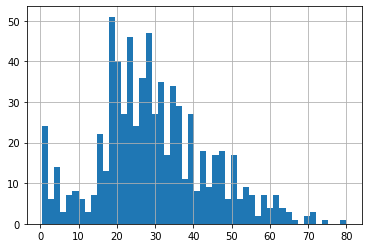

In [473]:
df.Age.hist(bins=50)

In [474]:
#values present at end of distribution
extreme=df.Age.mean()+3*df.Age.std()

C:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

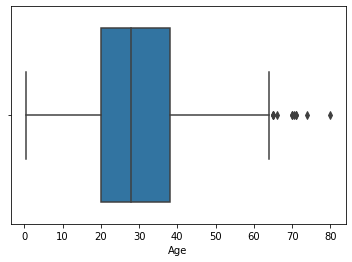

In [475]:
# outliers
import seaborn as sns
sns.boxplot(df['Age'])

In [476]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True) #age nan=median

we replace nan values of age with median because we want to see its comaprison with age end distribution

In [477]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

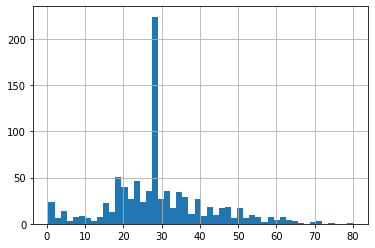

In [478]:
# all nan values is replaced by median so thats why more data is present near 30
df['Age'].hist(bins=50)

<AxesSubplot:>

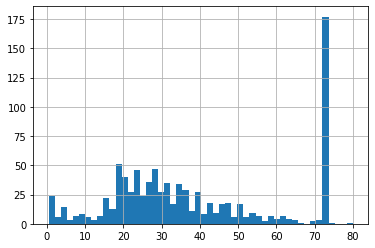

In [479]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

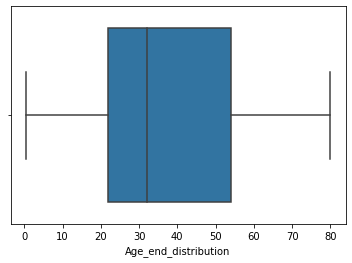

In [480]:
#outliers have been removed using this method
sns.boxplot('Age_end_distribution',data=df)
 

advantage:captures the importance of missingess if there is one.
disadvantage:distorts the original distribution of the variable.

## How To Handle Categroical Missing Values:

### 5. Frequent Category Imputation
In this we can replace the less NAN values feature with the most frequent occuring value

In [481]:
# Here we used advanced house pricing dataset.
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [482]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

As there is less NAN values in BsmtQual and GarageType, we will replace it with most freq. value because it will not distort it relationship with its own features.

###### Compute the frequency with every feature

<AxesSubplot:>

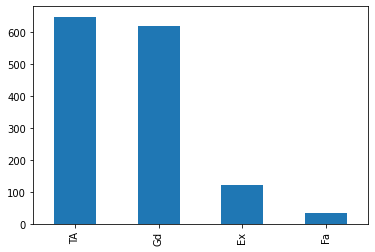

In [483]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

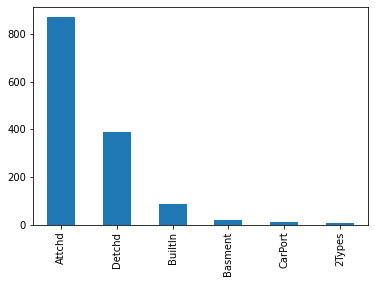

In [484]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

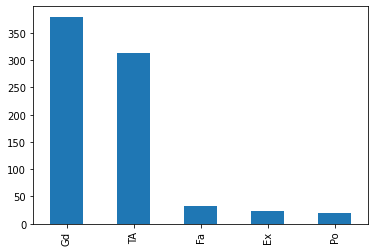

In [485]:
df['FireplaceQu'].value_counts().plot.bar()

In [486]:
 df['GarageType'].mode()[0]

'Attchd'

In [487]:
frequent=df['GarageType'].value_counts().index[0] 

In [488]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [489]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [490]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [491]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

advantages: Fater way to implement.
    
disadvantages: if there are more nan, the most frequent value will be over represented.

#### case: Suppose if you have more frequent categories with nan, we just replace NAN with a new category by forming new feature and droping the old feature because now we dont need the old feature.

In [492]:
df=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [493]:
def impute_nan(df,variable):
    df[variable+'new_var']=np.where(df[variable].isnull(),'missing',df[variable])

In [494]:
for feature in ('BsmtQual','FireplaceQu','GarageType'):
                impute_nan(df,feature)

In [495]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [496]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


## One Hot Encoding

In [497]:
df=pd.read_csv('titanic_train.csv',usecols=['Sex','Embarked'])
df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [498]:
df.dropna(inplace=True)
pd.get_dummies(df,drop_first=True).head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


### One hot encoding with many categories in a feature.
In this we take top 10 most frequent categories in a feature and did one encoding on it and drop the remaining .

In [499]:
# Here we used mercedesbenz dataset in form of list.
df=pd.read_csv('mercedesbenz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [500]:
df['X1'].value_counts(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

we are just converting this features into a list and did one hot encodig into it.

In [501]:
lst_10=df.X1.value_counts(ascending=False).head(10).index
lst_10=list(lst_10)
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [502]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [503]:
lst_10.append('X1')
df[lst_10].head(10)

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
5,0,0,1,0,0,0,0,0,0,0,b
6,0,0,0,0,0,1,0,0,0,0,r
7,0,0,0,1,0,0,0,0,0,0,l
8,0,1,0,0,0,0,0,0,0,0,s
9,0,0,1,0,0,0,0,0,0,0,b
